In [1]:
import os.path as op
import matplotlib.pyplot as plt
from scipy import stats
import mne
from mne.datasets import sample
from mne import read_evokeds
import numpy as np
import matplotlib
%matplotlib qt 
import os
#交互式绘图
#from mne.time_frequency import tfr_morlet, psd_multitaper, psd_welch
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,
                               corrmap)
import pandas as pd
#import pingouin as pg

In [2]:
"""                                  01 原始数据 处理                                    """

#raw.pick_channels(['EEG FP1', 'EEG FP2', 'EEG F3', 'EEG F4', 'EEG C3', 'EEG C4', 'EEG P3', 'EEG P4', 'EEG O1', 'EEG O2', 'EEG F7', 'EEG F8', 'EEG T3', 'EEG T4', 'EEG T5', 'EEG T6', 'EEG FZ', 'EEG CZ', 'EEG PZ', 'EEG A1', 'EEG A2'])

Proc_folder = './CQdata/2024-5-10/蔡向阳'  # 更改为第四个文件夹的路径

#Proc_folder2 ="./CQdata/CQ_EEG_groups/1229-num-4/DA005162_胡宇/events"

#遍历文件夹并读取数据： 使用Python的os库遍历每个文件夹，读取其中的EDF文件，并将它们存储在一个列表中。

fif_files = []

for folder in [Proc_folder]:
    files = os.listdir(folder)
    fif_files.extend([os.path.join(folder, file) for file in files if file.endswith('蔡向阳.fif')])
#创建MNE Raw对象并叠加分析： 使用MNE-Python创建一个Raw对象，将所有EDF文件叠加在一起，然后进行分析。这里假设所有的EDF文件具有相同的采样率和通道配置。

raw_list = [mne.io.read_raw_fif(fif_file, preload=True) for fif_file in fif_files]

# 叠加分析
raw_combined = mne.concatenate_raws(raw_list)
raw_combined.plot()

Opening raw data file ./CQdata/2024-5-10/蔡向阳\Processed_蔡向阳.fif...
Isotrak not found
    Range : 25000 ... 805005 =     50.000 ...  1610.010 secs
Ready.


C:\Users\许愿\AppData\Local\Temp\ipykernel_27756\1261517844.py:18: RuntimeWarning: This filename (./CQdata/2024-5-10/蔡向阳\Processed_蔡向阳.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_list = [mne.io.read_raw_fif(fif_file, preload=True) for fif_file in fif_files]


Reading 0 ... 780005  =      0.000 ...  1560.010 secs...
Using qt as 2D backend.


In [74]:
# 查看当前的通道名称
print("原始通道名称:", raw_combined.ch_names)

# 创建一个字典，其中键是当前的通道名称，值是新通道名称
rename_dict = {
    'EEG FP1': 'Fp1',
    'EEG FP2': 'Fp2',
    'EEG F3': 'F3',
    'EEG F4': 'F4',
    'EEG C3': 'C3',
    'EEG C4': 'C4',
    'EEG P3': 'P3',
    'EEG P4': 'P4',
    'EEG O1': 'O1',
    'EEG O2': 'O2',
    'EEG F7': 'F7',
    'EEG F8': 'F8',
    'EEG T3': 'T3',
    'EEG T4': 'T4',
    'EEG T5': 'T5',
    'EEG T6': 'T6',
    'EEG FZ': 'Fz',
    'EEG CZ': 'Cz',
    'EEG PZ': 'Pz',
    'EEG A1': 'A1',
    'EEG A2': 'A2'
}

# 重命名通道
raw_combined.rename_channels(rename_dict)

# 查看新的通道名称
print("新的通道名称:", raw_combined.ch_names)
raw_combined.plot()
# 保存修改后的文件
raw_combined.save('./CQdata/2024-5-10/张秀/Processed_张秀.fif', overwrite=True)

原始通道名称: ['EEG FP1', 'EEG FP2', 'EEG F3', 'EEG F4', 'EEG C3', 'EEG C4', 'EEG P3', 'EEG P4', 'EEG O1', 'EEG O2', 'EEG F7', 'EEG F8', 'EEG T3', 'EEG T4', 'EEG T5', 'EEG T6', 'EEG FZ', 'EEG CZ', 'EEG PZ', 'EEG A1', 'EEG A2']
新的通道名称: ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz', 'A1', 'A2']
Writing D:\Py-code_EEG\1_EEG_Code\CQdata\2024-5-10\张秀\Processed_张秀.fif
Closing D:\Py-code_EEG\1_EEG_Code\CQdata\2024-5-10\张秀\Processed_张秀.fif
[done]


C:\Users\许愿\AppData\Local\Temp\ipykernel_8860\1812061134.py:36: RuntimeWarning: This filename (D:\Py-code_EEG\1_EEG_Code\CQdata\2024-5-10\张秀\Processed_张秀.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_combined.save('./CQdata/2024-5-10/张秀/Processed_张秀.fif', overwrite=True)


Channels marked as bad:
none


In [4]:
fif_file = './CQdata/2024-5-10/蔡向阳/Processed_sub.fif'
raw_new = mne.io.read_raw_fif(fif_file, preload=True)

raw_new.plot()

Opening raw data file ./CQdata/2024-5-10/蔡向阳/Processed_sub.fif...


C:\Users\许愿\AppData\Local\Temp\ipykernel_27756\1250127424.py:2: RuntimeWarning: This filename (./CQdata/2024-5-10/蔡向阳/Processed_sub.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_new = mne.io.read_raw_fif(fif_file, preload=True)


FileNotFoundError: fname does not exist: "D:\Py-code_EEG\1_EEG_Code\CQdata\2024-5-10\蔡向阳\Processed_sub.fif"

In [5]:
"""
             01-2 构建拥有电极定位的 Raw 数据——————————Custom_raw 并且提取Epochs
"""
#  ************************* 显式创建Raw对象  *******************************
# 创建Raw对象 & 创建info结构  ——> 内容包括：通道类型 ch_types 和 通道名称ch_names
# 设置采样频率sfreq为合成板默认的频率256Hz
ch_names=[ 'Fp1', 'Fp2', 'F3', 'F4', 'C3','C4', 'P3', 'P4',  'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz','A1', 'A2']

ch_types = ['eeg'] * 21
info = mne.create_info(
    ch_names, 
    ch_types=ch_types, 
    sfreq=500)
info.set_montage('standard_1020')
data = raw.get_data()
#"""  Method 1 """

custom_raw=mne.io.RawArray(data,info)

custom_raw.plot(start=20,duration=6)

NameError: name 'raw' is not defined

In [ ]:
"""  给原始数据————添加事件  """
sfreq = 500
events = np.array([
    [int(0 * sfreq), 0, 6],
    [int(15 * sfreq), 0, 7],  # [睁闭眼时间]
    
    [int(30 * sfreq), 0, 1],
    [int(33* sfreq), 0, 0],
    [int(36 * sfreq), 0, 2],
    [int(39 * sfreq), 0, 0],
    [int(42 * sfreq), 0, 3],  # [Group1——L1_L5]
    [int(45 * sfreq), 0, 0],
    [int(48 * sfreq), 0, 4],
    [int(51 * sfreq), 0, 0],  
    [int(54 * sfreq), 0, 5],
    [int(57 * sfreq), 0, 0], 
    [int(60 * sfreq), 0, 9],
      
    [int(70 * sfreq), 0, 1], 
    [int(73* sfreq), 0, 0],
    [int(76 * sfreq), 0, 2],
    [int(79 * sfreq), 0, 0],
    [int(82 * sfreq), 0, 3],  # [Group2——L1_L5]
    [int(85 * sfreq), 0, 0],
    [int(88 * sfreq), 0, 4],
    [int(91 * sfreq), 0, 0],  
    [int(94 * sfreq), 0, 5],
    [int(97 * sfreq), 0, 0],  
    [int(100 * sfreq), 0, 9],
     
    [int(110 * sfreq), 0, 1],
    [int(113* sfreq), 0, 0],
    [int(116 * sfreq), 0, 2],
    [int(119 * sfreq), 0, 0],
    [int(122 * sfreq), 0, 3],  # [Group3——L1_L5]
    [int(125 * sfreq), 0, 0],
    [int(128 * sfreq), 0, 4],
    [int(131 * sfreq), 0, 0],  
    [int(134 * sfreq), 0, 5],
    [int(137 * sfreq), 0, 0], 
    [int(140 * sfreq), 0, 9],
     
    [int(150 * sfreq), 0, 1],
    [int(153* sfreq), 0, 0],
    [int(156 * sfreq), 0, 2],
    [int(159 * sfreq), 0, 0],
    [int(162 * sfreq), 0, 3],  # [Group4——L1_L5]
    [int(165 * sfreq), 0, 0],
    [int(168 * sfreq), 0, 4],
    [int(171 * sfreq), 0, 0],  
    [int(174 * sfreq), 0, 5],
    [int(177 * sfreq), 0, 0],  
    [int(180 * sfreq), 0, 9],
    
    [int(190 * sfreq), 0, 1],
    [int(193* sfreq), 0, 0],
    [int(196 * sfreq), 0, 2],
    [int(199 * sfreq), 0, 0],
    [int(202 * sfreq), 0, 3],  # [Group5——L1_L5]
    [int(205 * sfreq), 0, 0],
    [int(208 * sfreq), 0, 4],
    [int(211 * sfreq), 0, 0],  
    [int(214 * sfreq), 0, 5],
    [int(217 * sfreq), 0, 0],  
    [int(220 * sfreq), 0, 9],
    
    [int(230 * sfreq), 0, 1],
    [int(233* sfreq), 0, 0],
    [int(236 * sfreq), 0, 2],
    [int(239 * sfreq), 0, 0],
    [int(242 * sfreq), 0, 3],  # [Group6——L1_L5]
    [int(245 * sfreq), 0, 0],
    [int(248 * sfreq), 0, 4],
    [int(251 * sfreq), 0, 0],  
    [int(254 * sfreq), 0, 5],
    [int(257 * sfreq), 0, 0],  
    [int(260 * sfreq), 0, 9],

])
onsets = events[:, 0] / raw.info['sfreq']
#event_descriptions = ['T0', 'T1', 'T2']
#mapping = {1: 'Event_1', 2: 'Event_2'}
# # 创建事件对象
#event_id = {'Event_1': 1, 'Event_2': 2}  # 事件标记映射到整数值
# 设置事件开始前时间为-0.1s , tmin:event开始前的时间，如果未指定，则默认为0
"""mapping durations events"""
#mapping = {1: 'Event_1', 2: 'Event_2'}
mapping ={1: 'L1', 2: 'L2', 3: 'L3', 4: 'L4', 5: 'L5', 0: 'Grey', 6: 'Open', 7: 'Close' ,9: 'break'}
durations = np.zeros_like(onsets)  # assumes instantaneous events 假设事件是瞬时的

descriptions = [mapping[event_id] for event_id in events[:, 2]]

events_Annotation  = mne.Annotations(onset=onsets,  # 将事件时间点转换为秒
                         duration=durations ,  # 事件持续时间duration=[0.7, 0.7,0.7, 0.7,0.7],
                         description=descriptions) # 事件标记描述
custom_raw.set_annotations(events_Annotation)
custom_raw.plot()
custom_raw.save('EEG_data/CQ_EEG_groups/1229/DA005162_胡宇/DA005162_胡宇4_events.fif', overwrite=True)  # 替换成新文件名

In [ ]:
#————————————————————————————————————————————————————批量添加事件——————————————————————————————————————————————
import mne
import numpy as np
import os

# 定义采样率和事件
sfreq = 500
events = np.array([
    [int(0 * sfreq), 0, 6],
    [int(15 * sfreq), 0, 7],  # [睁闭眼时间]
    [int(30 * sfreq), 0, 1],
    [int(33 * sfreq), 0, 0],
    [int(36 * sfreq), 0, 2],
    [int(39 * sfreq), 0, 0],
    [int(42 * sfreq), 0, 3],  # [Group1——L1_L5]
    [int(45 * sfreq), 0, 0],
    [int(48 * sfreq), 0, 4],
    [int(51 * sfreq), 0, 0],  
    [int(54 * sfreq), 0, 5],
    [int(57 * sfreq), 0, 0], 
    [int(60 * sfreq), 0, 9],
    [int(70 * sfreq), 0, 1], 
    [int(73 * sfreq), 0, 0],
    [int(76 * sfreq), 0, 2],
    [int(79 * sfreq), 0, 0],
    [int(82 * sfreq), 0, 3],  # [Group2——L1_L5]
    [int(85 * sfreq), 0, 0],
    [int(88 * sfreq), 0, 4],
    [int(91 * sfreq), 0, 0],  
    [int(94 * sfreq), 0, 5],
    [int(97 * sfreq), 0, 0],  
    [int(100 * sfreq), 0, 9],
    [int(110 * sfreq), 0, 1],
    [int(113 * sfreq), 0, 0],
    [int(116 * sfreq), 0, 2],
    [int(119 * sfreq), 0, 0],
    [int(122 * sfreq), 0, 3],  # [Group3——L1_L5]
    [int(125 * sfreq), 0, 0],
    [int(128 * sfreq), 0, 4],
    [int(131 * sfreq), 0, 0],  
    [int(134 * sfreq), 0, 5],
    [int(137 * sfreq), 0, 0], 
    [int(140 * sfreq), 0, 9],
    [int(150 * sfreq), 0, 1],
    [int(153 * sfreq), 0, 0],
    [int(156 * sfreq), 0, 2],
    [int(159 * sfreq), 0, 0],
    [int(162 * sfreq), 0, 3],  # [Group4——L1_L5]
    [int(165 * sfreq), 0, 0],
    [int(168 * sfreq), 0, 4],
    [int(171 * sfreq), 0, 0],  
    [int(174 * sfreq), 0, 5],
    [int(177 * sfreq), 0, 0],  
    [int(180 * sfreq), 0, 9],
    [int(190 * sfreq), 0, 1],
    [int(193 * sfreq), 0, 0],
    [int(196 * sfreq), 0, 2],
    [int(199 * sfreq), 0, 0],
    [int(202 * sfreq), 0, 3],  # [Group5——L1_L5]
    [int(205 * sfreq), 0, 0],
    [int(208 * sfreq), 0, 4],
    [int(211 * sfreq), 0, 0],  
    [int(214 * sfreq), 0, 5],
    [int(217 * sfreq), 0, 0],  
    [int(220 * sfreq), 0, 9],
    [int(230 * sfreq), 0, 1],
    [int(233 * sfreq), 0, 0],
    [int(236 * sfreq), 0, 2],
    [int(239 * sfreq), 0, 0],
    [int(242 * sfreq), 0, 3],  # [Group6——L1_L5]
    [int(245 * sfreq), 0, 0],
    [int(248 * sfreq), 0, 4],
    [int(251 * sfreq), 0, 0],  
    [int(254 * sfreq), 0, 5],
    [int(257 * sfreq), 0, 0],  
    [int(260 * sfreq), 0, 9],
])

# 定义事件映射
mapping = {1: 'L1', 2: 'L2', 3: 'L3', 4: 'L4', 5: 'L5', 0: 'Grey', 6: 'Open', 7: 'Close', 9: 'break'}

input_folder = './CQdata/2024-5-10/'
output_folder = './CQdata/2024-5-10/'

# 遍历输入文件夹下的所有文件
for file_name in os.listdir(input_folder):
    if file_name.endswith('.fif') and 'DA0051A3_廖新研' in file_name:
        # 读取原始数据文件
        raw = mne.io.read_raw_fif(os.path.join(input_folder, file_name), preload=True)
        
        # 计算事件的onset时间（以秒为单位）
        onsets = events[:, 0] / raw.info['sfreq']
        durations = np.zeros_like(onsets)  # 假设事件是瞬时的
        descriptions = [mapping[event_id] for event_id in events[:, 2]]
        
        # 创建事件注释对象
        events_Annotation = mne.Annotations(onset=onsets, duration=durations, description=descriptions)
        
        # 设置注释
        raw.set_annotations(events_Annotation)
        
        # 可视化（如果需要）
        raw.plot()

        # 保存处理后的数据
        output_file_name = os.path.join(output_folder, f'processed_{file_name}')
        raw.save(output_file_name, overwrite=True)
        
        # 关闭数据文件
        raw.close()

In [7]:
raw=raw_combined

In [9]:
"""数据 预处理 设置 重参考"""
raw.set_eeg_reference(ref_channels=['A1','A2']) # 使用平均参考,不报错
raw.plot()
#custom_raw.info

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


In [10]:
"""滤波"""
#raw = custom_raw
"""低通滤波去除电源线噪声"""
raw.filter(0, 30., fir_design='firwin')
#raw.plot()#_psd(area_mode='range', tmax=10.0, average=False)
# """高通滤波消除缓慢漂移"""
# raw.filter(1., None, fir_design='firwin')
raw.plot(start=0,duration=10)

Filtering raw data in 6 contiguous segments
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Channels marked as bad:
none
Channels marked as bad:
none


In [4]:
(events, event_id) = mne.events_from_annotations(raw)  # 将annotation类型的事件转换为events类型
events.shape, event_id 
print("所有通道名称:", raw.ch_names)

所有通道名称: ['EEG FP1', 'EEG FP2', 'EEG F3', 'EEG F4', 'EEG C3', 'EEG C4', 'EEG P3', 'EEG P4', 'EEG O1', 'EEG O2', 'EEG F7', 'EEG F8', 'EEG T3', 'EEG T4', 'EEG T5', 'EEG T6', 'EEG FZ', 'EEG CZ', 'EEG PZ', 'EEG A1', 'EEG A2']


In [11]:
"""滤波"""
#raw = custom_raw
"""低通滤波去除电源线噪声"""
raw.filter(None, 30., fir_design='firwin')
raw.plot()#_psd(area_mode='range', tmax=10.0, average=False)
"""高通滤波消除缓慢漂移"""
raw.filter(1., None, fir_design='firwin')
raw.plot()#_psd(area_mode='range', tmax=10.0, average=False)

Filtering raw data in 6 contiguous segments
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 6 contiguous segments
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Channels marked as bad:
none
Channels marked as bad:
none


EEG channel type selected for re-referencing
Applying a custom EEG reference.


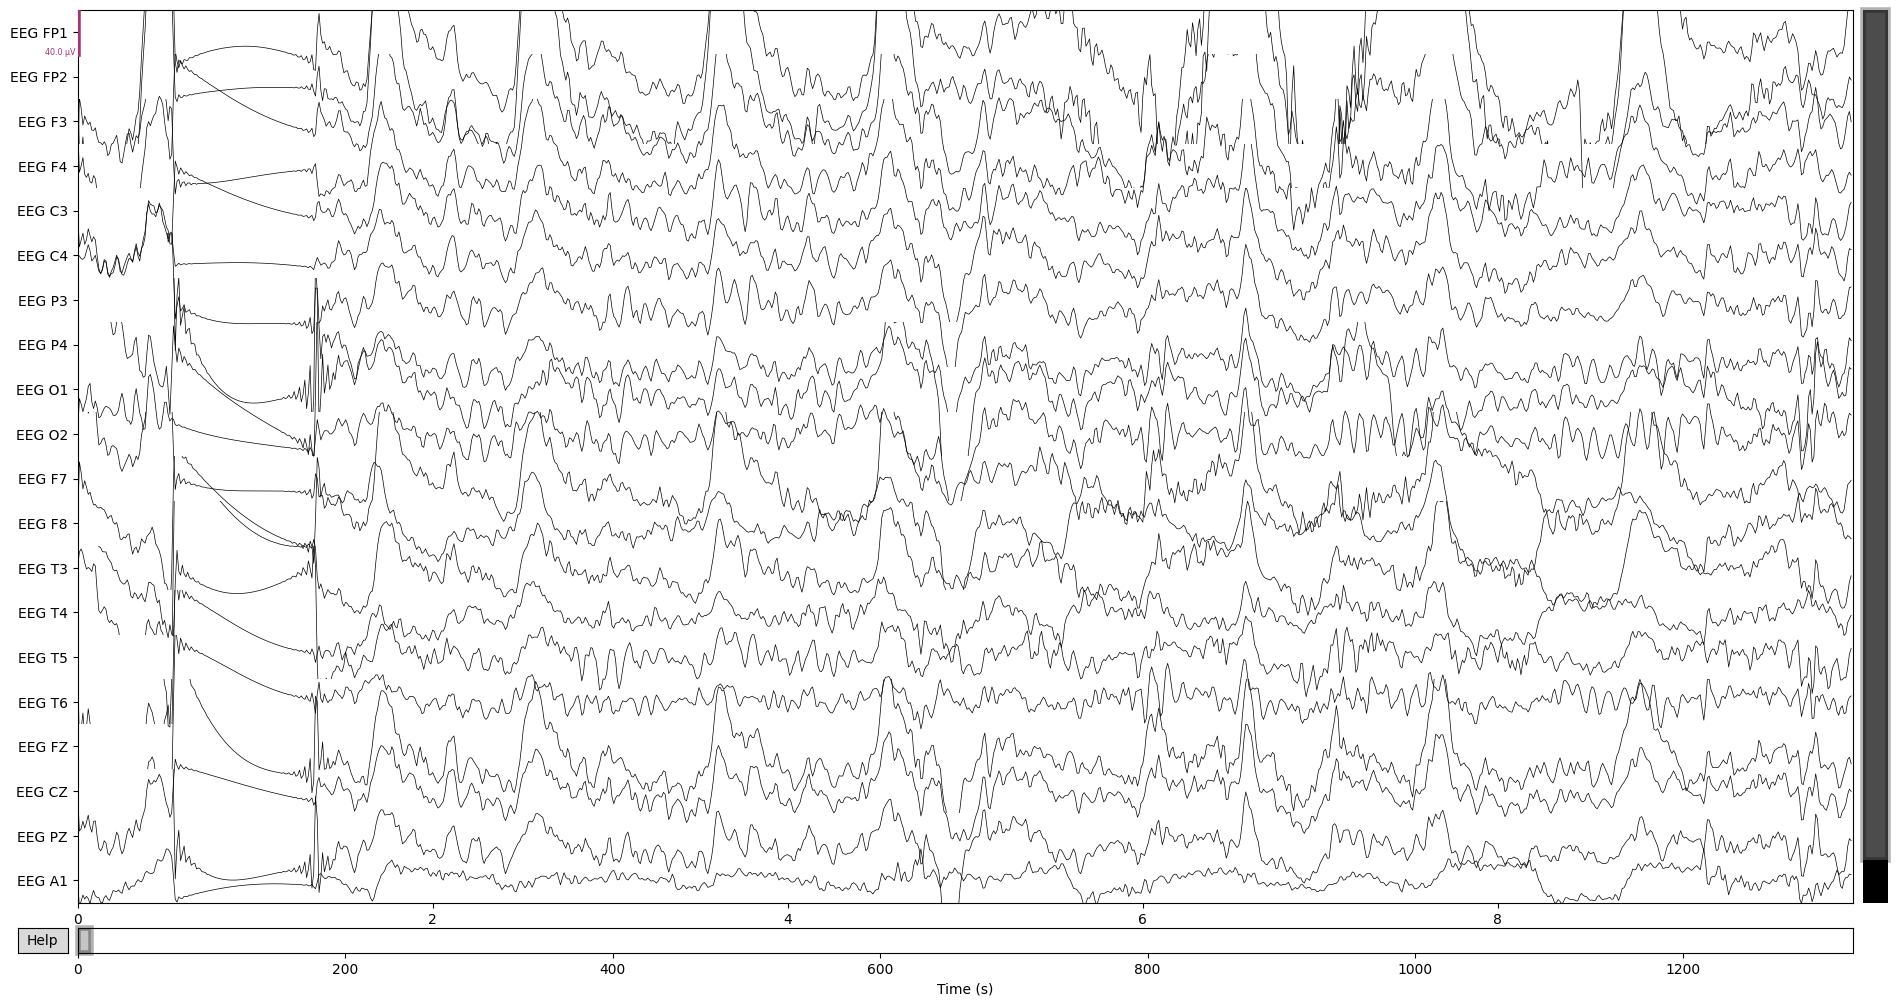

In [7]:
"""数据 预处理 设置 重参考"""
raw.set_eeg_reference(ref_channels=['EEG A1','EEG A2']) # 使用平均参考,不报错
raw.plot()
#custom_raw.info

In [12]:
# 独立成分分析 ICA
# 运行ICA
ica = ICA(max_iter='auto')#表示算法将自动选择最适合的迭代次数来拟合数据。这意味着算法将根据数据的复杂性自动调整迭代次数，以在不引入过度拟合的情况下找到最佳解。
raw_for_ica = raw.copy()
ica.fit(raw_for_ica) 

ica.plot_sources(raw_for_ica) # 绘制各成分的时序信号图
ica.plot_components() # 绘制各成分地形图


Fitting ICA to data using 21 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 20 components
Fitting ICA took 12.3s.
Creating RawArray with float64 data, n_channels=20, n_times=780006
    Range : 25000 ... 805005 =     50.000 ...  1610.010 secs
Ready.


RuntimeError: No digitization points found.

In [15]:
"""单独可视化某个需要查看多项属性的成分"""
ica.plot_properties(raw_for_ica, picks=[2,5,6])


    Using multitaper spectrum estimation with 7 DPSS windows


RuntimeError: No digitization points found.

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 21 PCA components


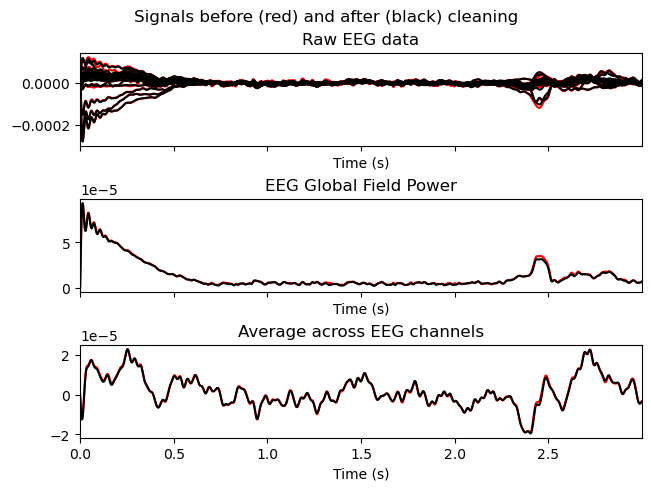

In [13]:
""" 查看去掉   某一成分前后    信号差异"""
ica.plot_overlay(raw_for_ica, exclude=[2,5])

In [14]:
"""绘制ICA后的数据波形图"""
raw.plot(duration=5, n_channels=19, clipping=None)

Channels marked as bad:
none


In [81]:
"""                                  01 原始数据 处理                                    """
file1 = "./CQdata/2024-5-10/DA00519H_CXY_1-1.edf"
# file2 = "./EEG_data/eeg-move_imagery-data/files/S001/S001R11.edf"
# file2 = "EEG_data/CQ_EEG_groups/11-05EEGtools/Ori_LYZ_EEGTOOLs_YB.edf"
#file3 = "EEG_data/CQ_EEG_groups/LYZ/sub1028_11-05_LYZ1.fif"
# file4 = "EEG_data/CQ_EEG_groups/ZJL/sub1028_11-05_ZJL4.fif"
# *************************************** 1. 读取文件 ********************************************
#raw.crop(tmax=60)
raw = mne.io.read_raw_edf(file1, preload=True)
raw.pick_channels(['EEG FP1', 'EEG FP2', 'EEG F3', 'EEG F4', 'EEG C3', 'EEG C4', 'EEG P3', 'EEG P4', 'EEG O1', 'EEG O2', 'EEG F7', 'EEG F8', 'EEG T3', 'EEG T4', 'EEG T5', 'EEG T6', 'EEG FZ', 'EEG CZ', 'EEG PZ', 'EEG A1', 'EEG A2'])

#raw.info
raw.plot(start=20,duration=6)
# 获取文件的总时长
#duration_seconds = raw.n_times / raw.info['sfreq']

Extracting EDF parameters from D:\Py-code_EEG\1_EEG_Code\CQdata\2024-5-10\DA00519H_CXY_1-1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 836999  =      0.000 ...  1673.998 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [82]:
"""                                            批量————————————切割文件"""

# 定义起始时间和结束时间列表
start_times = [50, 360, 680, 1020, 1400]  # 替换为你实
际的起始时间
end_times = [310, 620, 940, 1280, 1660]   # 替换为你实际的结束时间

# 检查列表长度是否一致
if len(start_times) != len(end_times):
    raise ValueError("起始时间和结束时间列表的长度不一致")

# 遍历每一对时间，进行数据裁剪并保存
for i, (start_time, end_time) in enumerate(zip(start_times, end_times)):
    # 裁剪数据
    raw_subset = raw.copy().crop(tmin=start_time, tmax=end_time)
    
    # 生成文件名
    filename = f'CQdata/2024-5-10/DA00519H_蔡向阳{i+1}.fif'
    
    # 保存裁剪后的数据
    raw_subset.save(filename, overwrite=True)
    
    # 关闭裁剪后的数据文件
    raw_subset.close()

# 关闭原始数据文件
raw.close()

Writing D:\Py-code_EEG\1_EEG_Code\CQdata\2024-5-10\DA00519H_蔡向阳1.fif
Closing D:\Py-code_EEG\1_EEG_Code\CQdata\2024-5-10\DA00519H_蔡向阳1.fif
[done]
Writing D:\Py-code_EEG\1_EEG_Code\CQdata\2024-5-10\DA00519H_蔡向阳2.fif
Closing D:\Py-code_EEG\1_EEG_Code\CQdata\2024-5-10\DA00519H_蔡向阳2.fif
[done]
Writing D:\Py-code_EEG\1_EEG_Code\CQdata\2024-5-10\DA00519H_蔡向阳3.fif
Closing D:\Py-code_EEG\1_EEG_Code\CQdata\2024-5-10\DA00519H_蔡向阳3.fif


C:\Users\许愿\AppData\Local\Temp\ipykernel_21032\2499116587.py:20: RuntimeWarning: This filename (D:\Py-code_EEG\1_EEG_Code\CQdata\2024-5-10\DA00519H_蔡向阳1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_subset.save(filename, overwrite=True)
C:\Users\许愿\AppData\Local\Temp\ipykernel_21032\2499116587.py:20: RuntimeWarning: This filename (D:\Py-code_EEG\1_EEG_Code\CQdata\2024-5-10\DA00519H_蔡向阳2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_subset.save(filename, overwrite=True)
C:\Users\许愿\AppData\Local\Temp\ipykernel_21032\2499116587.py:20: RuntimeWarning: This filename (D:\Py-code_EEG\1_EEG_Code\CQdata\2024-5-10\DA0

[done]
Writing D:\Py-code_EEG\1_EEG_Code\CQdata\2024-5-10\DA00519H_蔡向阳4.fif
Closing D:\Py-code_EEG\1_EEG_Code\CQdata\2024-5-10\DA00519H_蔡向阳4.fif
[done]
Writing D:\Py-code_EEG\1_EEG_Code\CQdata\2024-5-10\DA00519H_蔡向阳5.fif
Closing D:\Py-code_EEG\1_EEG_Code\CQdata\2024-5-10\DA00519H_蔡向阳5.fif
[done]


C:\Users\许愿\AppData\Local\Temp\ipykernel_21032\2499116587.py:20: RuntimeWarning: This filename (D:\Py-code_EEG\1_EEG_Code\CQdata\2024-5-10\DA00519H_蔡向阳4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_subset.save(filename, overwrite=True)
C:\Users\许愿\AppData\Local\Temp\ipykernel_21032\2499116587.py:20: RuntimeWarning: This filename (D:\Py-code_EEG\1_EEG_Code\CQdata\2024-5-10\DA00519H_蔡向阳5.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_subset.save(filename, overwrite=True)


Channels marked as bad:
none


In [29]:
"""切割文件"""

# 2. 定义您的时间段（以秒为单位）实验总计 ------  260s
start_time = 20
end_time = 280

# 3. 切割数据
raw_subset = raw.copy().crop(tmin=start_time, tmax=end_time)

# 4. 保存切割后的数据
raw_subset.save('CQdata/2024-5-10/DA00518A_高小琴_5.fif', overwrite=True)

# 5. 关闭原始数据文件和切割后的数据文件
raw.close()
raw_subset.close()

Writing D:\Py-code_EEG\1_EEG_Code\CQdata\2024-5-10\DA00518A_高小琴_5.fif
Closing D:\Py-code_EEG\1_EEG_Code\CQdata\2024-5-10\DA00518A_高小琴_5.fif
[done]


C:\Users\许愿\AppData\Local\Temp\ipykernel_21032\1966586343.py:11: RuntimeWarning: This filename (D:\Py-code_EEG\1_EEG_Code\CQdata\2024-5-10\DA00518A_高小琴_5.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_subset.save('CQdata/2024-5-10/DA00518A_高小琴_5.fif', overwrite=True)


In [87]:
file2 = "./CQdata/2024-5-10/DA0051A3_LXY_1-1.edf"
raw = mne.io.read_raw_edf(file2, preload=True)
raw.plot(start=10,duration=10)

Extracting EDF parameters from D:\Py-code_EEG\1_EEG_Code\CQdata\2024-5-10\DA0051A3_LXY_1-1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 774999  =      0.000 ...  1549.998 secs...


In [20]:
file1 = "CQdata/2024-5-10/processed_DA005177_沈楠恬2.fif"

# *************************************** 1. 读取文件 ********************************************
#raw.crop(tmax=60)
raw = mne.io.read_raw_fif(file1, preload=True)
raw.plot()

Opening raw data file CQdata/2024-5-10/processed_DA005177_沈楠恬2.fif...
Isotrak not found
    Range : 295000 ... 425000 =    590.000 ...   850.000 secs
Ready.
Reading 0 ... 130000  =      0.000 ...   260.000 secs...


C:\Users\许愿\AppData\Local\Temp\ipykernel_8860\1386354581.py:5: RuntimeWarning: This filename (CQdata/2024-5-10/processed_DA005177_沈楠恬2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file1, preload=True)


Channels marked as bad:
none
